# Titanic

Observar detenidamente los siguientes gráficos. NO importa si no entienden el código con el que se generaron.
* ¿Qué conclusiones pueden extraer de ellos?
* ¿Cuáles utilizarían para justificar la validez o no de la siguiente afirmación: *En el Titanic, al momento de sobrevivir, era favorable viajar con un hijo/a*?

Opcionalmente, pueden usar como información *a priori* las siguientes conclusiones de análisis anteriores:
* Las mujeres tienen una probabilidad más alta de supervivencia que los hombres.
* Los bebes y niños (hasta 12 años) tienen una probabilidad más alta de supervivencia que los adolescentes, adultos y ancianos.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
### Carga de datos
df = pd.read_csv('ds_encuentro_titanic.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Nota:** en la variable *parch* (parent-child) del dataset está la información relativa a quienes viajaban con padres o hijos. En *sibsp* (sibling - spouse) quienes viajaban con hermanos o parejas.

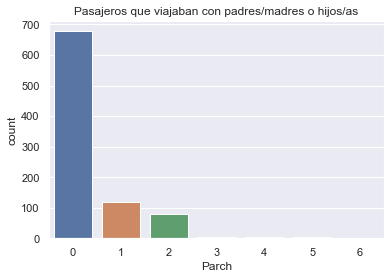

In [4]:
sns.countplot(df.Parch)
plt.title('Pasajeros que viajaban con padres/madres o hijos/as')
#plt.ylim([0,25])
plt.show()

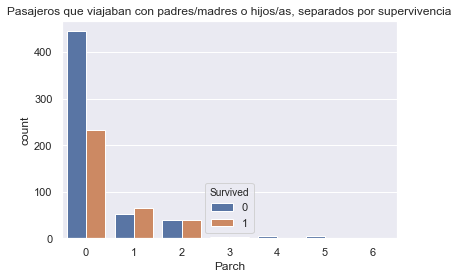

In [5]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por supervivencia')
plt.show()

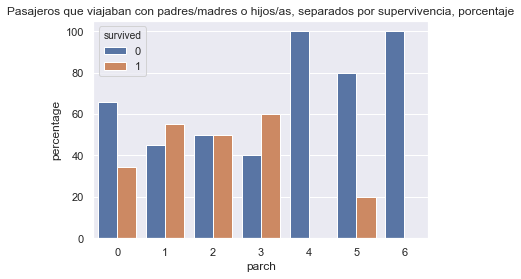

In [23]:
grouped=df.groupby(['Parch'])
parch_counts = grouped['Survived'].value_counts(normalize=True)
#Return a Series containing counts of unique values.
#If True then the object returned will contain the relative frequencies of the unique
df_parch_data = pd.DataFrame(parch_data)

plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por supervivencia, porcentaje')
sns.barplot(x="parch", y="percentage", hue="survived", data=df_parch_data)
plt.show()

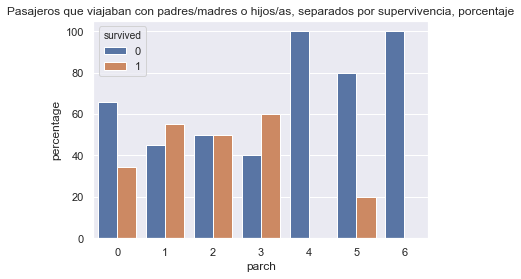

In [24]:
grouped = df.groupby(['Parch'])
parch_counts = grouped['Survived'].value_counts(normalize=True)
parch_data = [
    {'parch': parch, 'survived': survived, 'percentage': percentage*100} for 
    (parch, survived), percentage in dict(parch_counts).items()]

df_parch_data = pd.DataFrame(parch_data)

plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por supervivencia, porcentaje')
sns.barplot(x="parch", y="percentage", hue="survived", data=df_parch_data)
plt.show()


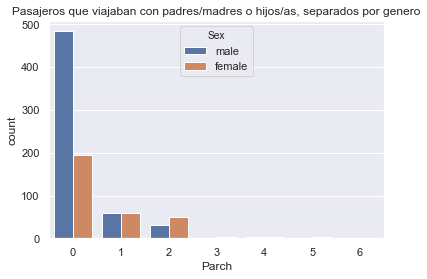

In [25]:
sns.countplot(x='Parch', hue='Sex', data=df, hue_order = ['male', 'female'])
plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por genero')
plt.show()

    parch     sex  percentage
0       0    male   71.386431
1       0  female   28.613569
2       1  female   50.847458
3       1    male   49.152542
4       2  female   61.250000
5       2    male   38.750000
6       3  female   80.000000
7       3    male   20.000000
8       4  female   50.000000
9       4    male   50.000000
10      5  female   80.000000
11      5    male   20.000000
12      6  female  100.000000


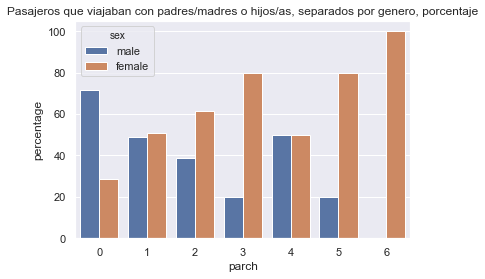

In [26]:
grouped = df.groupby(['Parch'])
parch_counts = grouped['Sex'].value_counts(normalize=True)
parch_data = [
   {'parch': parch, 'sex': sex, 'percentage': percentage*100} for 
    (parch, sex), percentage in dict(parch_counts).items()]

df_parch_data = pd.DataFrame(parch_data)
print(df_parch_data )
plt.title('Pasajeros que viajaban con padres/madres o hijos/as, separados por genero, porcentaje')
sns.barplot(x="parch", y="percentage", hue="sex", data=df_parch_data)
plt.show()

Con la información que tienen hasta acá, ¿qué pueden decir acerca de la validez de la afirmación presentada?¿Qué gráficos les gustaría hacer para seguir explorando? No importa si no lo saben hacer, describirlo y explicar qué esperarían ver.

**Una vez que hayan hecho eso, correr la celda de abajo (cambiar False por True)**. ¡No lo hagan antes!

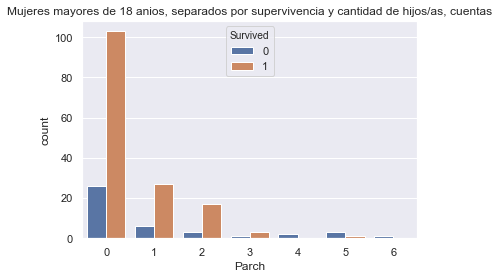

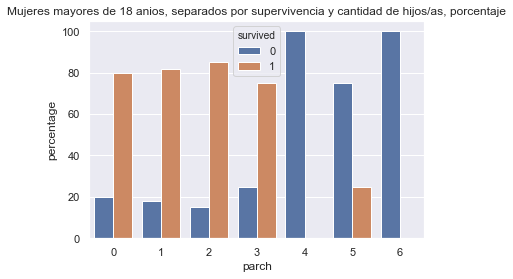

In [27]:
if True:
    ## Separamos del dataset aquellas mujeres mayores de 18 anios
    df_mujeres = df[df.Sex == 'female']
    df_mujeres_adultas = df_mujeres[df_mujeres.Age > 18]

    ##
    
    plt.title('Mujeres mayores de 18 anios, separados por supervivencia y cantidad de hijos/as, cuentas')
    sns.countplot(x="Parch", hue="Survived", data=df_mujeres_adultas)
    plt.show()
    
    
    grouped = df_mujeres_adultas.groupby(['Parch'])
    parch_counts = grouped['Survived'].value_counts(normalize=True)
    parch_data = [
        {'parch': parch, 'survived': survived, 'percentage': percentage*100} for 
        (parch, survived), percentage in dict(parch_counts).items()]

    df_parch_data = pd.DataFrame(parch_data)

    plt.title('Mujeres mayores de 18 anios, separados por supervivencia y cantidad de hijos/as, porcentaje')
    sns.barplot(x="parch", y="percentage", hue="survived", data=df_parch_data)
    plt.show()